First, we'll read in the CSV and display the first few rows of data:

In [18]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import numpy as np

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/LearnDataSci/glossary/main/data/protein.csv')
df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


We'll first store the features for clustering in X2, which are contained in all rows and columns from 1 to 10:

In [8]:
X2 = df.iloc[:,1:10]

Again, we use the linkage function for clustering the data:

In [9]:
Z2 = linkage(X2, method='ward', metric='euclidean')

Finally, we can plot a dendrogram of the ward linkage clustering of 25 countries based on their protein consumption:

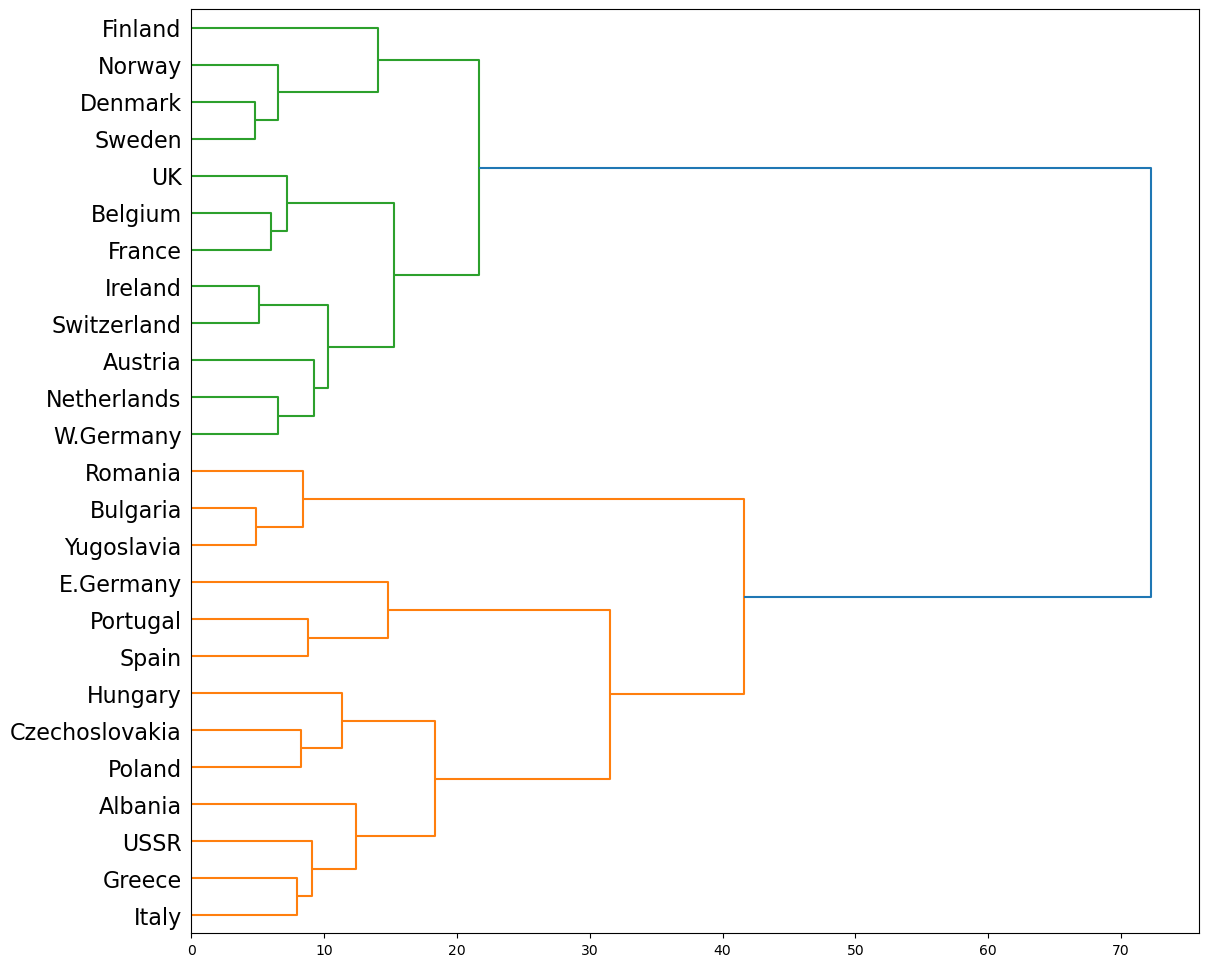

In [10]:
labelList = list(df['Country'])

plt.figure(figsize=(13, 12))
dendrogram(
    Z2,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()

From the dendrogram, we can observe two distinct clusters colored green and yellow. This result indicates that countries in each cluster get their protein from similar sources.

Using the fcluster function, we can find and add the cluster labels for each country to the data frame.

In [15]:
df['Clusters'] = fcluster(Z2, 2, criterion='maxclust')

df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg,Clusters
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,2
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,1
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,1
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,2


In [25]:
from sklearn.cluster import AgglomerativeClustering

Z2 = AgglomerativeClustering(n_clusters=2, linkage='ward')

Z2.fit_predict(X2)

print(Z2.labels_)

[0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0]
